In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [5]:
# Read data and write onto dataframe
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [6]:
# Find size of dataframe
df.shape

(96, 4)

In [7]:
# Explore data - what countries are there data for?
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [8]:
# Explore data - what years are there data for?
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [9]:
# Rename column to one word for easy wrangling
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Text(0, 0.5, 'Count')

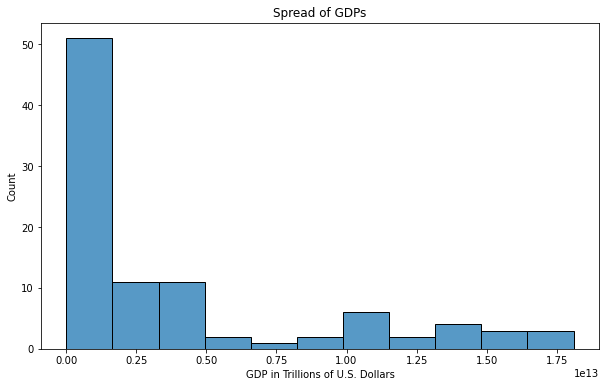

In [52]:
# Observe the Overall Spread of GDP
plt.figure(figsize=(10,6))
sns.histplot(df.GDP)
plt.title('Spread of GDPs')
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.ylabel('Count')

Text(0, 0.5, 'Count')

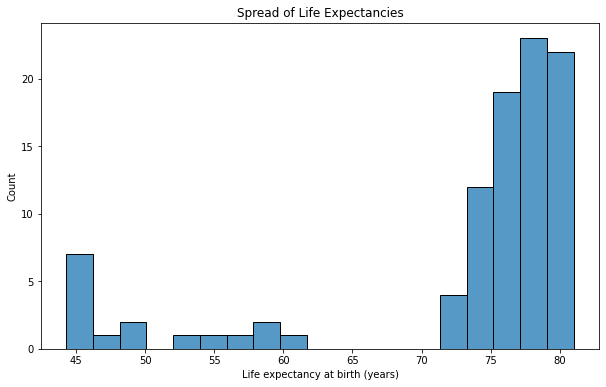

In [53]:
# Observe the Overall Spread of Life Expectancy
plt.figure(figsize=(10,6))
sns.histplot(df.LEABY)
plt.title('Spread of Life Expectancies')
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel('Count')

In [24]:
# Create a new dataframe based on the means of the columns
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
print(dfMeans)

                    Country     LEABY           GDP
0                     Chile  78.94375  1.697888e+11
1                     China  74.26250  4.957714e+12
2                   Germany  79.65625  3.094776e+12
3                    Mexico  75.71875  9.766506e+11
4  United States of America  78.06250  1.407500e+13
5                  Zimbabwe  50.09375  9.062580e+09


Text(0, 0.5, 'Life Expectancy (years)')

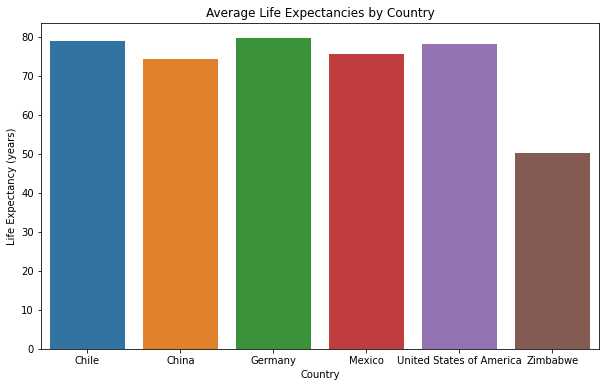

In [48]:
# Observe the Average Life Expectancies of the various Countries
plt.figure(figsize=(10,6))
sns.barplot(y="LEABY", x="Country", data=dfMeans)
plt.title('Average Life Expectancies by Country')
plt.xlabel('Country')
plt.ylabel("Life Expectancy (years)")

Text(0, 0.5, 'GDP (USD)')

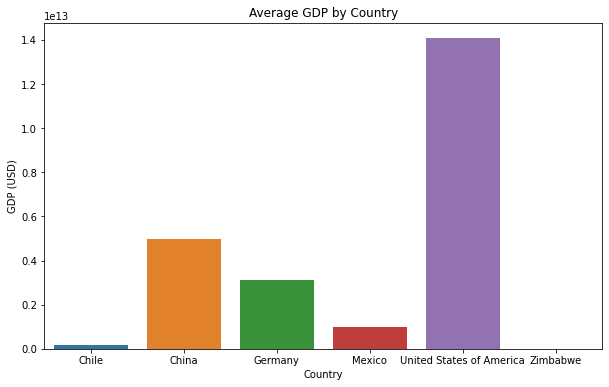

In [49]:
# Observe the Average GDPs of the various Countries
plt.figure(figsize=(10,6))
sns.barplot(y="GDP", x="Country", data=dfMeans)
plt.title('Average GDP by Country')
plt.xlabel("Country")
plt.ylabel('GDP (USD)')

Text(0.5, 1.0, 'GDP Ranges by Country')

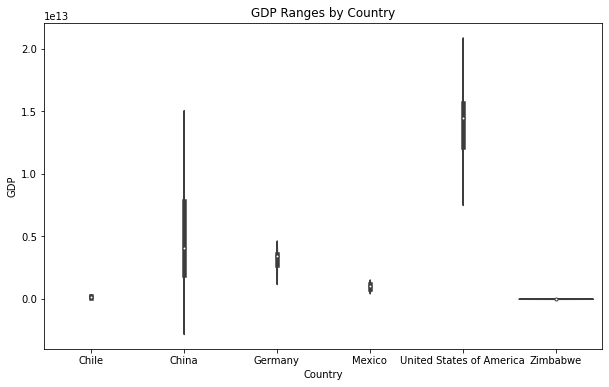

In [47]:
# Observe the Range of GDPs of the various Countries
plt.figure(figsize=(10, 6))
sns.violinplot(y=df.GDP, x=df.Country)
plt.title('GDP Ranges by Country')

Text(0, 0.5, 'Life Expectancy (Years)')

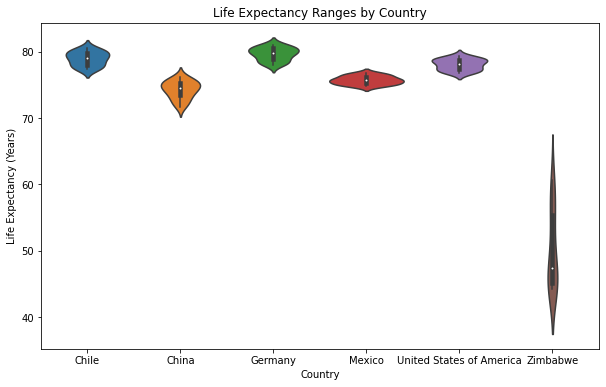

In [74]:
# Observe the Range of Life Expectancies of the various Countries
plt.figure(figsize=(10, 6))
sns.violinplot(y=df.LEABY, x=df.Country)
plt.title('Life Expectancy Ranges by Country')
plt.ylabel("Life Expectancy (Years)")

Text(0.5, 1.0, 'Spreads of GDP by Country')

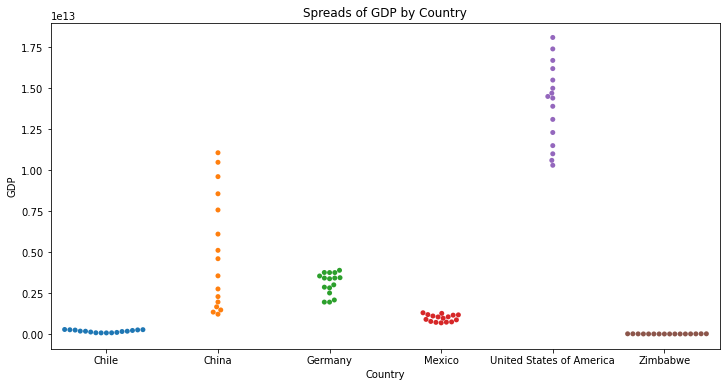

In [57]:
# Observe the Spread of GDP by Country
plt.figure(figsize=(12,6))
sns.swarmplot(y=df.GDP, x=df.Country)
plt.title("Spreads of GDP by Country")

Text(0.5, 1.0, 'Spreads of GDP by Country')

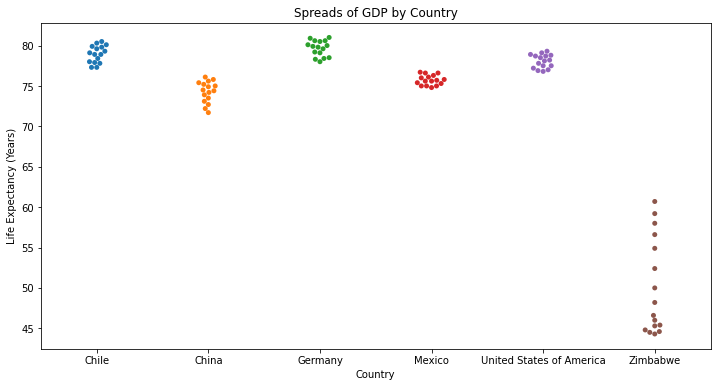

In [59]:
# Observe the Spread of Life Expectancy by Country
plt.figure(figsize=(12,6))
sns.swarmplot(y=df.LEABY, x=df.Country)
plt.ylabel("Life Expectancy (Years)")
plt.title("Spreads of GDP by Country")

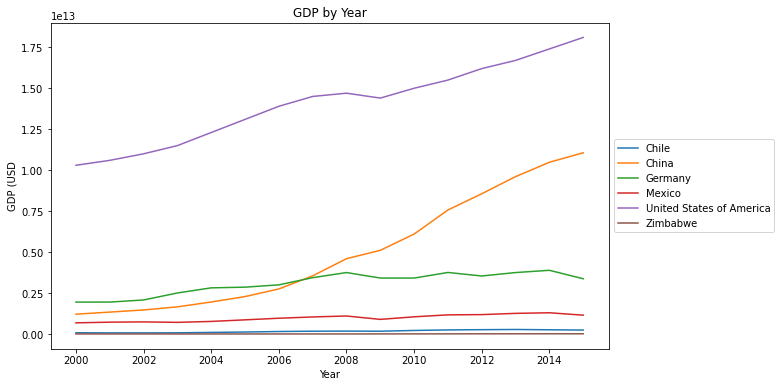

In [77]:
# Observe how Overall GDP has changed with Time
plt.figure(figsize=(10,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('GDP by Year')
plt.ylabel("GDP (USD");

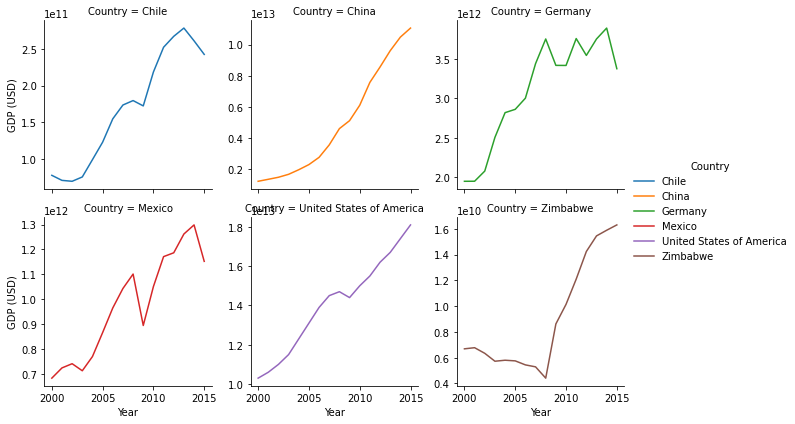

In [79]:
# Observe how Individual Countries' GDPs have changed with Time
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP (USD)"))

graphGDP;

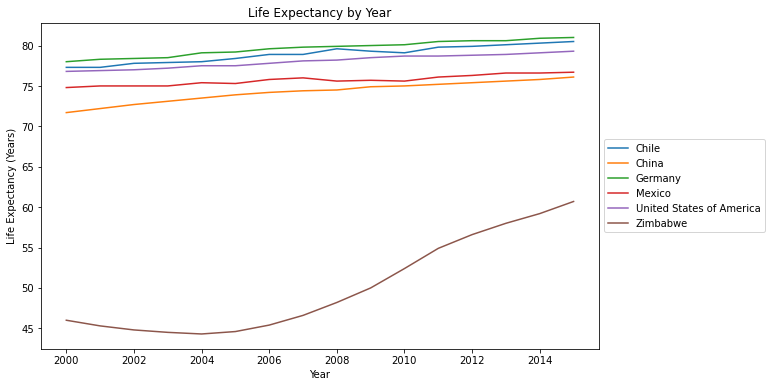

In [87]:
# Observe how Overall Life Expectancy has changed with Time
plt.figure(figsize=(10,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Life Expectancy by Year')
plt.ylabel("Life Expectancy (Years)");

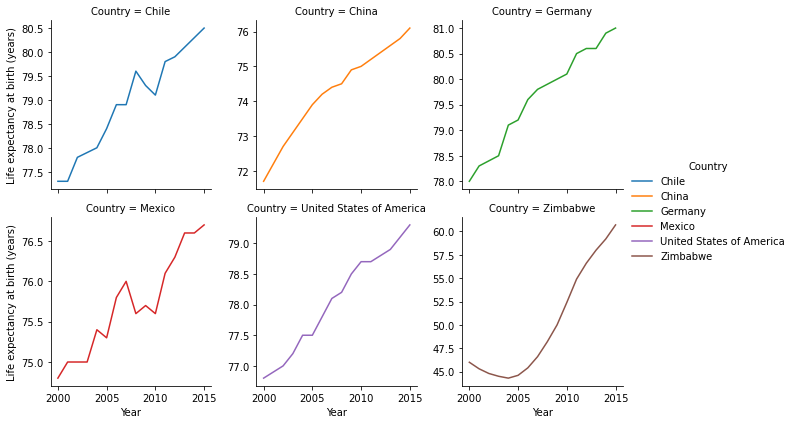

In [80]:
# Observe how Individual Countries' Life Expectancies have changed with Time
graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEABY;

Text(0, 0.5, 'GDP')

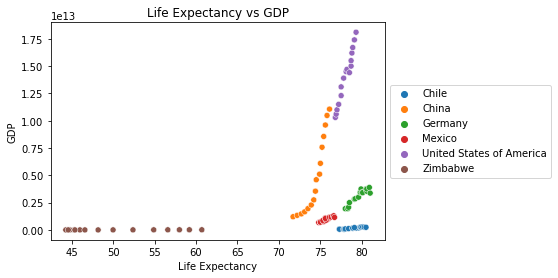

In [84]:
# Observe how Overall GDP changes with Life Expectancy
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);
plt.title('Life Expectancy vs GDP')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')

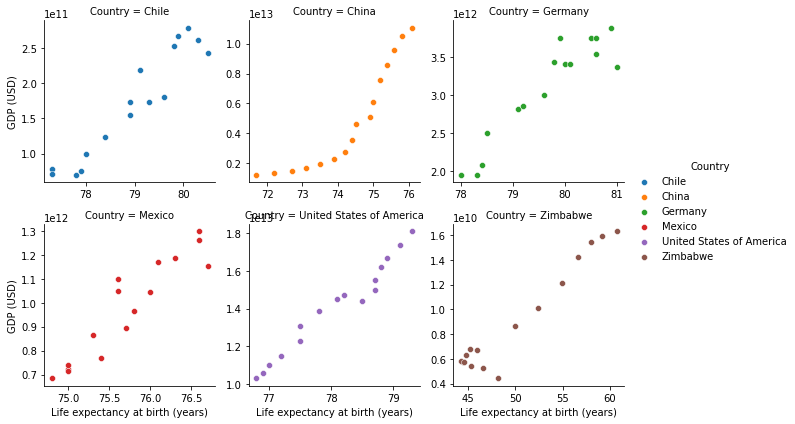

In [86]:
# Observe how Individual Countries' GDP change with Life Expectancy
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP (USD)"));
